Sabhyam Mishra
KH.EN.P2MCA25151

The CIFAR10 dataset.

we have 10 classes. these 10 classes form 10 neurons of output layer.

Importing Necessary Libraries

In [2]:
import tensorflow as tf

from tensorflow.keras.datasets import cifar10 as cf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [3]:

(x_train, y_train), (x_test, y_test) = cf.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [7]:
import numpy as np
indices = np.random.randint(0, x_train.shape[0], size=16)

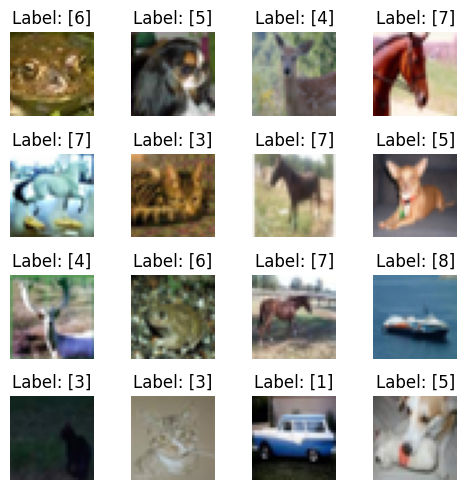

In [11]:
# Create a figure and subplots
fig, axes = plt.subplots(4, 4, figsize=(5, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, ax in enumerate(axes):
    image = x_train[indices[i]]
    label = y_train[indices[i]]
    ax.imshow(image)
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# Reshape data for CNN input
img_rows, img_cols = 32, 32
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3) 
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)


In [13]:
x_train.shape
#x_test.shape

(50000, 32, 32, 3)

In [14]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
# Convert class vectors to binary class matrices

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [16]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [17]:
# Create a CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same', strides=1))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(num_classes, activation='softmax'))  

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adamw', metrics=['accuracy'])

In [24]:
# Train the model
history=model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 124ms/step - accuracy: 0.7312 - loss: 0.7725 - val_accuracy: 0.6519 - val_loss: 1.0268
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - accuracy: 0.7519 - loss: 0.7221 - val_accuracy: 0.6482 - val_loss: 1.0334
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.7581 - loss: 0.6936 - val_accuracy: 0.6514 - val_loss: 1.0365
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.7674 - loss: 0.6740 - val_accuracy: 0.6496 - val_loss: 1.0419
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - accuracy: 0.7814 - loss: 0.6345 - val_accuracy: 0.6374 - val_loss: 1.1217
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.7883 - loss: 0.6102 - val_accuracy: 0.6510 - val_loss: 1.0423
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.8016 - loss: 0.5755 - val_accuracy: 0.6446 - val_loss: 1.1016
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - accuracy: 0.8069 - loss: 0

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,152,672 (12.03 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,101,782 (8.02 MB)

In [26]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6437 - loss: 1.1527
Test accuracy: 0.6417999863624573


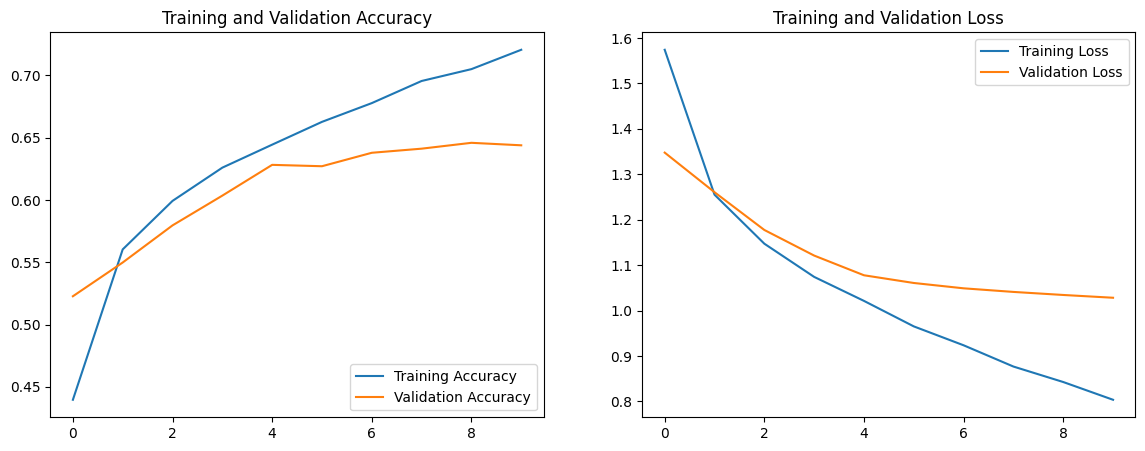

In [22]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()